# **IQGateway Task1 - Malaria Detection**


#### Detecting Malaria cells using Convolutional Neural Networks

#### Steps to solve this problem:

#### 1.Importing Necessary Libraries

#### 2.Understanding Data

#### 3.Labelling Data

#### 4.Dividing Data into train and test sets

#### 5.Preparing model using Train data

#### 6.Evaluating model using Test data(Finding Accuracy and Confusion Matrix

#### 7.Plotting Random samples of Test images with their predicted labels

#### 8.Results

## **Importing Necessary Libraries**

In [39]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np # linear algebra
import pandas as pd # data processing
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from glob import glob
import os

In [40]:
#paths for infected and uninfected images
infected_path = '../input/cell-images-for-detecting-malaria/cell_images/Parasitized/'
uninfected_path ='../input/cell-images-for-detecting-malaria/cell_images/Uninfected/'

## **Understanding Data**

#### No of infected examples

In [41]:
#finding no of infected images
infected_images = glob(infected_path+'*.png')
print("No of infected images:")
len(infected_images)

No of infected images:


13779

#### No of uninfected examples

In [42]:
#finding number of uninfected images
uninfected_images = glob(uninfected_path+'*.png')
print("No of uninfected images:")
len(uninfected_images)

No of uninfected images:


13779

#### plotting some infected cell images 

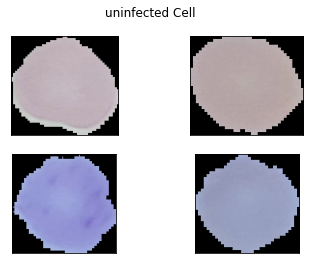

In [43]:
#plotting first four uninfected cell images
plt.figure()
plt.subplot(2 , 2 , 1)
plt.imshow(cv2.imread(uninfected_images[0]))
plt.xticks([]) , plt.yticks([])

plt.subplot(2 , 2 , 2)
plt.imshow(cv2.imread(uninfected_images[1]))
plt.xticks([]) , plt.yticks([])

plt.subplot(2 , 2 , 3)
plt.imshow(cv2.imread(uninfected_images[2]))
plt.xticks([]) , plt.yticks([])

plt.subplot(2 , 2 , 4)
plt.imshow(cv2.imread(uninfected_images[3]))
plt.suptitle('uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

#### Plotting some infected cell images

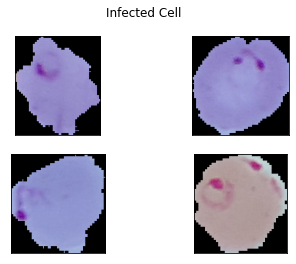

In [44]:
#plotting first four infected cell images
plt.figure()
plt.subplot(2 , 2 , 1)
plt.imshow(cv2.imread(infected_images[0]))
plt.xticks([]) , plt.yticks([])

plt.subplot(2 , 2 , 2)
plt.imshow(cv2.imread(infected_images[1]))
plt.xticks([]) , plt.yticks([])

plt.subplot(2 , 2 , 3)
plt.imshow(cv2.imread(infected_images[2]))
plt.xticks([]) , plt.yticks([])

plt.subplot(2 , 2 , 4)
plt.imshow(cv2.imread(infected_images[3]))
plt.suptitle('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

#### PLotting both

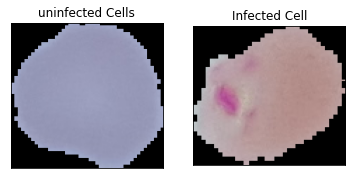

In [45]:
#plotting uninfected and infected cells for comparision
plt.figure()
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(uninfected_images[12]))
plt.title('uninfected Cells')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(infected_images[12]))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

## **Labelling Data**

#### Here we are storing images into list data and we are storing labels into list labels

#### We labelled 0 for infected and 1 for uninfected cell

In [46]:
#labeling data(0- infected, 1 - uninfected)
data=[]
labels=[]
#infected=os.listdir(infected_path)
for a in infected_images:
    
    try:
        image=cv2.imread(a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir(uninfected_path)
for b in uninfected_images:
    try:
        image=cv2.imread(b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50,50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

#### Storing Data and labels in Numpy arrays

In [47]:
Cells=np.array(data)#storing data into numpy array 'cells'
labels=np.array(labels)#converting list to numpy array

#### Shuffling data randomly

In [48]:
#Here we are shuffling data randomly for robustness
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [49]:
num_classes=len(np.unique(labels))
print("No of classes:")
print(num_classes)
len_data=len(Cells)
print("Length of Data :")
print(len_data)

No of classes:
2
Length of Data :
27558


## Dividing Data into Train and Test

In [50]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [51]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

#### One hot encoding 

In [52]:
#Doing One hot encoding as classifier has multiple classes
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

## Preparing the model

In [53]:
# Modelling Convolutional Neural Network
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 


#### Model summary

In [54]:
#model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 32)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)       

#### Compiling model

In [55]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
#defining callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

#### Fitting the model

In [57]:
#Fiting the model with min batch size as 32 can tune batch size to some factor of 2^power  and epochs = 30
history=model.fit(x_train,y_train,batch_size=32,callbacks = [callbacks] ,validation_data=(x_test,y_test),epochs=30,verbose=1)

Epoch 1/30
776/776 [==============================] - 5s 6ms/step - loss: 0.6677 - accuracy: 0.5806 - val_loss: 0.2038 - val_accuracy: 0.9209
Epoch 2/30
776/776 [==============================] - 5s 6ms/step - loss: 0.2062 - accuracy: 0.9269 - val_loss: 0.1633 - val_accuracy: 0.9506
Epoch 3/30
776/776 [==============================] - 5s 6ms/step - loss: 0.1645 - accuracy: 0.9468 - val_loss: 0.1521 - val_accuracy: 0.9557
Epoch 4/30
776/776 [==============================] - 5s 6ms/step - loss: 0.1588 - accuracy: 0.9511 - val_loss: 0.1580 - val_accuracy: 0.9481
Epoch 5/30
776/776 [==============================] - 4s 6ms/step - loss: 0.1493 - accuracy: 0.9531 - val_loss: 0.1410 - val_accuracy: 0.9597
Epoch 6/30
776/776 [==============================] - 5s 6ms/step - loss: 0.1399 - accuracy: 0.9543 - val_loss: 0.1341 - val_accuracy: 0.9568
Epoch 7/30
776/776 [==============================] - 5s 6ms/step - loss: 0.1442 - accuracy: 0.9527 - val_loss: 0.1387 - val_accuracy: 0.9557
Epoch 

#### Saving model 

In [58]:
# Saving model as malaria_detection.h5
model.save('malaria_detection.h5')

#### Loading model

In [59]:
from keras.models import load_model
model = load_model('malaria_detection.h5')

## Evaluating model on Test Data

In [60]:
#We are computing model's accuracy on test data

score=model.evaluate(x_test,y_test)
print(score)
#As shown below test accuracy is 96%

87/87 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 0.9601
[0.12591423094272614, 0.9600725769996643]


#### Test Accuracy

In [61]:
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

87/87 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 0.9601

 Test_Accuracy:- 0.9600725769996643


#### Computing Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

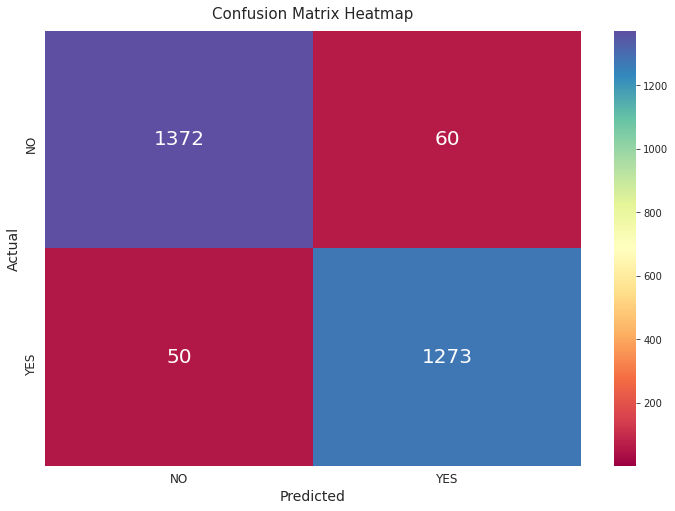

In [71]:
#CM = confusion_matrix(y_true, pred)
#from mlxtend.plotting import plot_confusion_matrix
#fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()
conf_mat = confusion_matrix(y_true,pred)
sns.set_style(style='white')
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(conf_mat,vmin=np.min(conf_mat.all()), vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":20},cmap='Spectral')
heatmap.set_title('Confusion Matrix Heatmap', fontdict={'fontsize':15}, pad=12)
heatmap.set_xlabel('Predicted',fontdict={'fontsize':14})
heatmap.set_ylabel('Actual',fontdict={'fontsize':14})
heatmap.set_xticklabels(['NO','YES'], fontdict={'fontsize':12})
heatmap.set_yticklabels(['NO','YES'], fontdict={'fontsize':12})
plt.show()

#### Classification report

In [64]:

from sklearn.metrics import classification_report

In [65]:
print('{}'.format( 
                           classification_report(y_true , pred)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1432
           1       0.95      0.96      0.96      1323

    accuracy                           0.96      2755
   macro avg       0.96      0.96      0.96      2755
weighted avg       0.96      0.96      0.96      2755



In [66]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
malaria_labels = ['Infected','Uninfected']

In [67]:

x_test.shape[0]

2755

## Plotting Random samples of Test images with their predicted labels

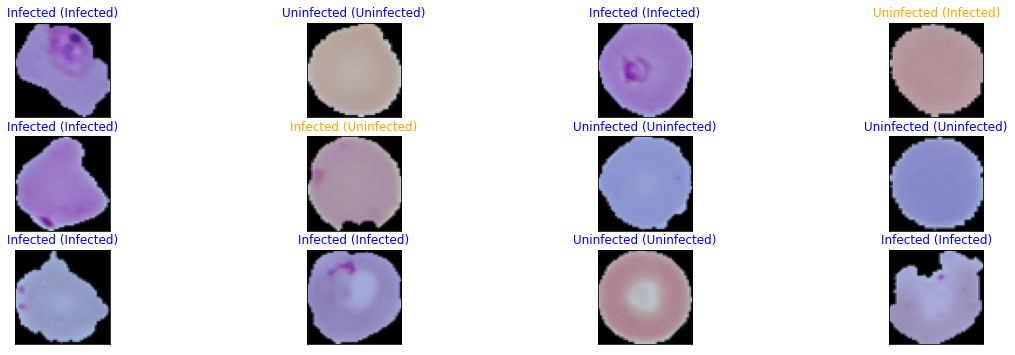

In [68]:
# plotting a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=12, replace=False)):
    ax = fig.add_subplot(4,4, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(malaria_labels[pred_idx], malaria_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "orange"))

## Results

In [1]:
print("Training Accuracy: ",history[1])
print('Test Accuracy : ',accuracy[1])

Training Accuracy: 96.01
Test Accuracy : 96.00
